In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the train data
train=pd.read_csv('train.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
train.shape

(54808, 14)

In [4]:

train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [6]:
# Read the test data
test=pd.read_csv('test.csv')
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [7]:
test.shape

(23490, 13)

In [8]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [10]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [11]:
train['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [12]:
#Filling na with mode
train.education.fillna("Bachelor's",inplace=True)
test.education.fillna("Bachelor's",inplace=True)

In [13]:
train.previous_year_rating.fillna(3.0,inplace=True)
test.previous_year_rating.fillna(3.0,inplace=True)

In [14]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [15]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [16]:
train["Source"] = "Train"
test["Source"] = "Test"

In [17]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Source
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,Train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,Train


In [18]:
fulldata = pd.concat([train,test])
fulldata.shape

(78298, 15)

In [19]:
fulldata.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Source
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,Train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,Train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,Train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,Train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,Train


In [20]:
fulldata.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Source
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN,Test
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN,Test
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN,Test
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70,NaN,Test
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,NaN,Test


In [21]:
fulldata.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted             float64
Source                   object
dtype: object

In [22]:
fulldata['length_of_service'].value_counts()

3     10066
4      9747
2      9554
5      8424
7      7895
6      6772
1      6539
8      4146
9      3699
10     3134
11     1268
12     1122
13      958
15      833
14      810
16      760
17      636
18      558
19      471
20      190
21      107
23       96
22       88
24       88
25       75
26       55
27       52
28       42
29       40
31       27
30       18
32       11
33       10
34        6
37        1
Name: length_of_service, dtype: int64

In [23]:
fulldata['department'].value_counts()

Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: department, dtype: int64

In [24]:
fulldata['gender'].value_counts()

m    55092
f    23206
Name: gender, dtype: int64

In [25]:
fulldata['no_of_trainings'].value_counts()

1     63306
2     11531
3      2531
4       658
5       164
6        68
7        21
8         7
9         7
10        5
Name: no_of_trainings, dtype: int64

In [26]:
# combine the levels which has less observations
fulldata.loc[fulldata['no_of_trainings']>=5,'no_of_trainings']='5_10'
fulldata['no_of_trainings'].value_counts()

1       63306
2       11531
3        2531
4         658
5_10      272
Name: no_of_trainings, dtype: int64

In [27]:
fulldata['previous_year_rating'].value_counts()

3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [28]:
fulldata['previous_year_rating'].value_counts()

3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: previous_year_rating, dtype: int64

In [29]:
fulldata['recruitment_channel'].value_counts()

other       43524
sourcing    33181
referred     1593
Name: recruitment_channel, dtype: int64

In [30]:
fulldata['region'].value_counts()

region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: region, dtype: int64

In [31]:
pd.crosstab(index=fulldata['region'],columns=fulldata['is_promoted'])       

is_promoted,0.0,1.0
region,,
region_1,552,58
region_10,597,51
region_11,1241,74
region_12,467,33
region_13,2418,230
region_14,765,62
region_15,2586,222
region_16,1363,102
region_17,687,109


In [32]:
map_dict={"region":{'region_1':0,'region_2':0,'region_3':0,'region_4':0,'region_5':0,'region_6':1,'region_7':1,'region_8':1,'region_9':1,'region_10':1,'region_11':2,
                       'region_12':2,'region_13':2,'region_14':2,'region_15':2,'region_16':3,'region_17':3,'region_18':3,'region_19':3,'region_20':3,
                       'region_21':4,'region_22':4,'region_23':4,'region_24':4,'region_25':4,'region_26':5,'region_27':5,'region_28':5,'region_29':5,'region_30':5,
                        'region_31':6,'region_32':6,'region_33':6,'region_34':6}}

In [33]:
fulldata=fulldata.replace(map_dict)
fulldata['region'].head()

0    1
1    4
2    3
3    4
4    5
Name: region, dtype: int64

In [34]:
fulldata['KPIs_met >80%'].value_counts()

0    50578
1    27720
Name: KPIs_met >80%, dtype: int64

In [35]:
fulldata.loc[fulldata['length_of_service']>30,'length_of_service']=30
fulldata['length_of_service'].value_counts()

3     10066
4      9747
2      9554
5      8424
7      7895
6      6772
1      6539
8      4146
9      3699
10     3134
11     1268
12     1122
13      958
15      833
14      810
16      760
17      636
18      558
19      471
20      190
21      107
23       96
22       88
24       88
25       75
30       73
26       55
27       52
28       42
29       40
Name: length_of_service, dtype: int64

In [36]:
np.percentile(train.loc[:,'age'], [92,93,95,96,97,98,99,100]) 

array([47., 48., 51., 52., 54., 56., 58., 60.])

In [37]:
np.percentile(train.loc[:,'age'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]) 

array([20., 20., 21., 22., 22., 22., 22., 22.])

In [38]:
np.percentile(train.loc[:,'length_of_service'], [92,93,95,96,97,98,99,100])

array([12., 13., 15., 16., 17., 18., 20., 37.])

In [39]:
np.percentile(train.loc[:,'length_of_service'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [40]:
np.percentile(train.loc[:,'avg_training_score'], [92,93,95,96,97,98,99,100]) 

array([84., 85., 86., 86., 87., 88., 91., 99.])

In [41]:
np.percentile(train.loc[:,'avg_training_score'], [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]) 

array([42., 43., 43., 43., 44., 44., 44., 44.])

In [42]:
full_set=fulldata.copy()

In [43]:
full_set['awards_won?']=full_set['awards_won?'].astype(object)
full_set['is_promoted']=full_set['is_promoted'].astype(object)
full_set['previous_year_rating']=full_set['previous_year_rating'].astype(object)
full_set['KPIs_met >80%']=full_set['KPIs_met >80%'].astype(object)
full_set['region']=full_set['region'].astype(object)

In [44]:
object_val=[x for x in full_set.dtypes.index if full_set.dtypes[x]=='object']
object_val

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted',
 'Source']

In [45]:
int_val=[x for x in full_set.dtypes.index if full_set.dtypes[x]!='object']
int_val

['employee_id', 'age', 'length_of_service', 'avg_training_score']

In [46]:
df_dummy = pd.DataFrame(data=full_set, columns=object_val)
df_dummy.drop('Source',axis=1,inplace=True)
df_dummy.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?', 'is_promoted'],
      dtype='object')

In [47]:
dummy_coded=pd.get_dummies(df_dummy,drop_first=True,dtype=float) # with K-1
dummy_fullset=pd.concat([full_set,dummy_coded],axis=1)
to_rem=object_val.copy()
to_rem.remove('Source')
dummy_fullset.drop(to_rem,axis=1,inplace=True)
dummy_fullset.columns

C:\Users\user\anaconda3\envs\r-tut\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Index(['employee_id', 'age', 'length_of_service', 'avg_training_score',
       'Source', 'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology', 'region_1',
       'region_2', 'region_3', 'region_4', 'region_5', 'region_6',
       'education_Below Secondary', 'education_Master's & above', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'no_of_trainings_2', 'no_of_trainings_3', 'no_of_trainings_4',
       'no_of_trainings_5_10', 'previous_year_rating_2.0',
       'previous_year_rating_3.0', 'previous_year_rating_4.0',
       'previous_year_rating_5.0', 'KPIs_met >80%_1', 'awards_won?_1',
       'is_promoted_1.0'],
      dtype='object')

In [48]:
dummy_fullset.head()

,employee_id,age,length_of_service,avg_training_score,Source,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,no_of_trainings_3,no_of_trainings_4,no_of_trainings_5_10,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1,is_promoted_1.0
0,65438,35,8,49,Train,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,65141,30,4,60,Train,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,7513,34,7,50,Train,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2542,39,10,50,Train,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48945,45,2,73,Train,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
dummy_fullset['Age_Awards_Won']=dummy_fullset['age'] * dummy_fullset['awards_won?_1']
dummy_fullset['Age_Awards_Won'].tail(20)

23470    0.0
23471    0.0
23472    0.0
23473    0.0
23474    0.0
23475    0.0
23476    0.0
23477    0.0
23478    0.0
23479    0.0
23480    0.0
23481    0.0
23482    0.0
23483    0.0
23484    0.0
23485    0.0
23486    0.0
23487    0.0
23488    0.0
23489    0.0
Name: Age_Awards_Won, dtype: float64

In [50]:
dummy_fullset['Age_Awards_Won'].value_counts()

0.0     76493
31.0      140
30.0      119
28.0      117
32.0      114
33.0      113
35.0      109
27.0      108
29.0      107
34.0       93
37.0       78
36.0       77
38.0       75
41.0       58
26.0       56
40.0       51
39.0       46
25.0       42
42.0       29
24.0       28
43.0       24
45.0       22
46.0       20
47.0       18
48.0       15
50.0       15
44.0       14
51.0       14
49.0       14
53.0       12
52.0       10
23.0        9
56.0        9
57.0        7
22.0        7
55.0        7
60.0        6
59.0        6
54.0        6
58.0        4
21.0        3
20.0        3
Name: Age_Awards_Won, dtype: int64

In [51]:
train_df=dummy_fullset.loc[dummy_fullset['Source']=='Train',:]
del train_df['Source']
test_df=dummy_fullset.loc[dummy_fullset['Source']=='Test',:]
del test_df['Source']

In [52]:
train_df.head()

,employee_id,age,length_of_service,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,...,no_of_trainings_4,no_of_trainings_5_10,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1,is_promoted_1.0,Age_Awards_Won
0,65438,35,8,49,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,65141,30,4,60,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7513,34,7,50,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2542,39,10,50,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48945,45,2,73,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
train_x=train_df.drop(['employee_id','region_1','region_2','region_3','region_4','region_5','region_6','is_promoted_1.0'],axis=1).copy()
test_x=test_df.drop(['employee_id','region_1','region_2','region_3','region_4','region_5','region_6','is_promoted_1.0'],axis=1).copy()

In [54]:
train_x.head()

,age,length_of_service,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,...,no_of_trainings_3,no_of_trainings_4,no_of_trainings_5_10,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1,Age_Awards_Won
0,35,8,49,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,30,4,60,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,34,7,50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,39,10,50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,2,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
train_y=train_df['is_promoted_1.0']
test_y=test_df['is_promoted_1.0']

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

# RandomForest

In [66]:
# Choosing the optimal parameter for the classifier                     

param_grid = [{'max_depth':[2,3,4,6,8,10,12,14,16]}]

scorer={'recall_score': make_scorer(recall_score)}

RF = RandomForestClassifier(random_state = 123,n_estimators=300,criterion='entropy',class_weight={0:0.54,1:5.87},max_features='sqrt')
#RF_GS=GridSearchCV(RF,param_grid=param_grid,scoring=scorer,refit='recall_score',cv=3,n_jobs=-1)
#RF_GS.fit(train_x,train_y)  
#RF_GS.best_params_

In [64]:
RF_GS.best_score_

0.8828191945158527

In [67]:
RF_1 = RandomForestClassifier(random_state = 123,n_estimators=300,criterion='entropy',class_weight={0:0.54,1:5.87},max_depth=8,max_features='sqrt')
RF_1.fit(train_x,train_y)

RandomForestClassifier(class_weight={0: 0.54, 1: 5.87}, criterion='entropy',
                       max_depth=8, n_estimators=300, random_state=123)

In [66]:
# predict on train set
pred_RF=RF_1.predict(train_x)
metrics.recall_score(train_y,pred_RF) 

0.9003856041131105

In [67]:
metrics.f1_score(train_y,pred_RF) 

0.3330295947070243

In [68]:
Var_Importance_RF= pd.Series(data=RF_1.feature_importances_,index=train_x.columns,name='variables')
Var_Importance_RF

age                             0.015732
length_of_service               0.013596
avg_training_score              0.317037
department_Finance              0.002248
department_HR                   0.004560
department_Legal                0.001742
department_Operations           0.010257
department_Procurement          0.004314
department_R&D                  0.002004
department_Sales & Marketing    0.033855
department_Technology           0.008305
education_Below Secondary       0.000837
education_Master's & above      0.004105
gender_m                        0.003356
recruitment_channel_referred    0.002648
recruitment_channel_sourcing    0.002183
no_of_trainings_2               0.002753
no_of_trainings_3               0.001894
no_of_trainings_4               0.000762
no_of_trainings_5_10            0.000678
previous_year_rating_2.0        0.007989
previous_year_rating_3.0        0.010811
previous_year_rating_4.0        0.009611
previous_year_rating_5.0        0.106077
KPIs_met >80%_1 

In [69]:
# subset x and y with important predictors
least_importance=Var_Importance_RF[Var_Importance_RF.values < 0.005].index
train_x_1=train_x.drop(least_importance,axis=1).copy()
test_x_1=test_x.drop(least_importance,axis=1).copy()

In [70]:
least_importance

Index(['department_Finance', 'department_HR', 'department_Legal',
       'department_Procurement', 'department_R&D', 'education_Below Secondary',
       'education_Master's & above', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'no_of_trainings_2', 'no_of_trainings_3', 'no_of_trainings_4',
       'no_of_trainings_5_10'],
      dtype='object')

In [72]:
RF_2 = RandomForestClassifier(random_state = 123,n_estimators=100,criterion='entropy',class_weight={0:0.54,1:5.87},max_depth=8,max_features='sqrt')
RF_2=RF_2.fit(train_x_1,train_y)

In [73]:
# predict on test set
pred_train_RF_2=RF_2.predict(train_x_1)
metrics.recall_score(train_y,pred_train_RF_2)

0.9153813196229649

In [74]:
Var_Importance_RF_2= pd.Series(data=RF_2.feature_importances_,index=train_x_1.columns,name='variables')
Var_Importance_RF_2

age                             0.019992
length_of_service               0.017593
avg_training_score              0.341186
department_Operations           0.012938
department_Sales & Marketing    0.041755
department_Technology           0.009037
previous_year_rating_2.0        0.006478
previous_year_rating_3.0        0.011297
previous_year_rating_4.0        0.010161
previous_year_rating_5.0        0.100278
KPIs_met >80%_1                 0.331549
awards_won?_1                   0.048635
Age_Awards_Won                  0.049103
Name: variables, dtype: float64

In [75]:
# subset-2 with important predictors
least_importance_2=Var_Importance_RF_2[Var_Importance_RF_2.values < 0.008].index
train_x_2=train_x_1.drop(least_importance_2,axis=1).copy()
test_x_2=test_x_1.drop(least_importance_2,axis=1).copy()

In [75]:
least_importance_2

Index(['previous_year_rating_2.0'], dtype='object')

In [76]:
RF_3 = RandomForestClassifier(random_state = 123,n_estimators=400,criterion='entropy',class_weight={0:0.54,1:2.5},max_depth=8,max_features='sqrt')
RF_3=RF_3.fit(train_x_2,train_y)

In [77]:
# predict on test set
pred_train_RF_3=RF_3.predict(train_x_2)
metrics.recall_score(train_y,pred_train_RF_3)

0.42159383033419023

In [78]:
Var_Importance_RF_3= pd.Series(data=RF_3.feature_importances_,index=train_x_2.columns,name='variables')
Var_Importance_RF_3

age                             0.019045
length_of_service               0.018216
avg_training_score              0.360136
department_Operations           0.017471
department_Sales & Marketing    0.055220
department_Technology           0.010318
previous_year_rating_3.0        0.010408
previous_year_rating_4.0        0.009161
previous_year_rating_5.0        0.096282
KPIs_met >80%_1                 0.299589
awards_won?_1                   0.052075
Age_Awards_Won                  0.052078
Name: variables, dtype: float64

In [79]:
metrics.f1_score(train_y,pred_train_RF_3)

0.46773618538324424

<AxesSubplot:>

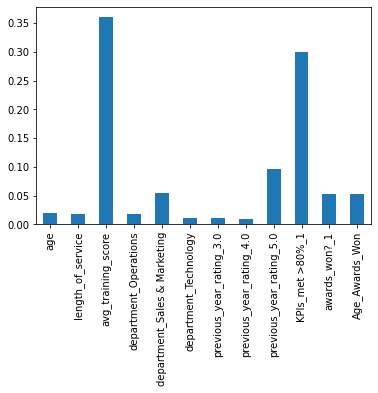

In [80]:
Var_Importance_RF_3.plot(kind='bar')

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
cross_val=cross_val_score(RF_3,train_x_2,train_y,cv=5,scoring='f1',n_jobs=-1)

In [84]:
cross_val

array([0.45953928, 0.424821  , 0.42521632, 0.4451146 , 0.44996892])

In [85]:
# predict the test set
test_P=RF_3.predict(test_x_2)

In [86]:
test_P.shape

(23490,)

In [110]:
test_pr=pd.DataFrame(test_P)

In [114]:
test_pr

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23485    0.0
23486    0.0
23487    0.0
23488    0.0
23489    1.0
Name: 0, Length: 23490, dtype: float64

In [87]:
output=pd.DataFrame({'employee_id':test['employee_id'],'is_promoted':test_P})
output.head()

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


In [117]:
output['is_promoted']=output['is_promoted'].astype(int)

In [118]:
output.to_csv("RandomForest_sol2.csv", index = False)

# Adaptive Boosting


In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
from sklearn.ensemble import AdaBoostClassifier
estimator=DecisionTreeClassifier(max_depth=3,random_state=100,class_weight={0:1,1:4})
AB= AdaBoostClassifier(base_estimator=estimator,random_state=100)

In [91]:
paramgrid={'n_estimators':[50,100,150,200],'learning_rate':[0.2,0.4,0.6,0.8,1]}
scorer={'f1_score': make_scorer(f1_score)}
AdaGS=GridSearchCV(AB,param_grid=paramgrid,scoring=scorer,refit='f1_score',cv=3,n_jobs=-1)
AdaBo_Model=AdaGS.fit(train_x_2,train_y)
AdaBo_Model.best_score_

0.46030961223420214

In [92]:
AdaBo_Model.best_params_

{'learning_rate': 0.2, 'n_estimators': 50}

In [93]:
AB_1= AdaBoostClassifier(base_estimator=estimator,n_estimators=50,learning_rate=0.2,random_state=100)
m1=AB_1.fit(train_x_2,train_y)

In [94]:
# predict on train set
train_P=m1.predict(train_x_2)
metrics.recall_score(train_y,train_P) 

0.44751499571550984

In [95]:
metrics.f1_score(train_y,train_P) 

0.47792267215740103

In [96]:
cross_val=cross_val_score(m1,train_x_2,train_y,cv=3,scoring='f1',n_jobs=-1)

In [97]:
cross_val

array([0.45685279, 0.45790554, 0.4661705 ])

In [98]:
# predict the test set
test_P=m1.predict(test_x_2)

In [99]:
output=pd.DataFrame({'employee_id':test['employee_id'],'is_promoted':test_P})
output.head()

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,0.0


In [101]:
output.to_csv("AdaBoost_sol.csv", index = False)

# XGBoost Classifier

In [124]:
!pip install xgboost

In [56]:
import xgboost as xgb
from xgboost import XGBClassifier

In [57]:
xgboost = XGBClassifier()

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
from pprint import pprint

# Number of trees
n_estimators = np.arange(200,1000,200)

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.6,0.1)

# Default 0.3, range(0,1)
learning_rate = np.arange(0.1,0.6,0.1)

# Maximum number of levels in tree
max_depth = list(range(3,8,1))

# Subsample ratio of the training instances.Range(0,1)
subsample = np.arange(0.5,0.9,0.1)

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = np.arange(0.5,0.9,0.1)

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }
pprint(random_grid_xgb)

{'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]),
 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]),
 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
 'max_depth': [3, 4, 5, 6, 7],
 'n_estimators': array([200, 400, 600, 800]),
 'scale_pos_weight': [1, 3.5],
 'subsample': array([0.5, 0.6, 0.7, 0.8])}


In [60]:
# Use randomized search
xgb_random = RandomizedSearchCV(estimator = xgboost, 
                                param_distributions = random_grid_xgb, 
                                n_iter = 100, 
                                cv = 3, 
                                verbose=1, 
                                random_state=42, 
                                n_jobs = -1,
                                scoring ='roc_auc')

In [78]:
xgb_random.fit(train_x_2,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]),
                                        'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': array([200, 400, 600, 800]),
                                        'scale_pos_weight': [1, 3.5],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8])},
                   random_state=42, scoring='roc_auc', verbose=1)

In [135]:
train_P=xgb_random.predict(train_x_2)
metrics.recall_score(train_y,train_P) 

0.4496572407883462

In [79]:
# predict the test set
test_P=xgb_random.predict(test_x_2)

In [80]:
output_xg=pd.DataFrame({'employee_id':test['employee_id'],'is_promoted':test_P})
output_xg.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [81]:
output_xg['is_promoted']=output_xg['is_promoted'].astype(int)

In [82]:
output_xg.to_csv("XGBoost_Sol.csv", index = False)